In [26]:
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import collections
import csv

from pprint import pprint as pp
import circlify as circ

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

DIR = os.getcwd()

# 2020 Contributions


In [27]:
df20 = pd.read_csv(DIR + "/2019to2020contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df20_selections = df20[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation", "contributor_first_name", 
                   "contributor_middle_name", "contributor_last_name"]]

faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA",
       "CAROLINA"]
df20_selections = df20_selections[~df20_selections.contributor_employer.str.contains('|'.join(faux))]
df20_selections = df20_selections[df20_selections["contribution_receipt_amount"] >= 0]

df20_biden = df20_selections[df20_selections["committee_name"].str.contains("BIDEN FOR PRESIDENT")]
df20_biden.reset_index()
df20_trump = df20_selections[df20_selections["committee_name"].str.contains("DONALD J. TRUMP FOR PRESIDENT, INC.")]
df20_trump.reset_index()

df20_biden = df20_biden.groupby(["contribution_receipt_date"], as_index=False).sum()
df20_trump = df20_trump.groupby(["contribution_receipt_date"], as_index=False).sum()

   trump_campaign_events biden_campaign_events dem_debates gop_debates  \
0                11/7/18               4/25/19     6/26/19     9/24/19   
1                6/18/19                4/8/20     7/30/19    10/26/19   
2                3/17/20               8/11/20     9/12/19    10/28/19   
3                8/24/20               8/18/20    10/15/19         NaN   
4                    NaN                   NaN    11/20/19         NaN   
5                    NaN                   NaN    12/19/19         NaN   
6                    NaN                   NaN     1/14/20         NaN   
7                    NaN                   NaN      2/7/20         NaN   
8                    NaN                   NaN     2/19/20         NaN   
9                    NaN                   NaN     2/25/20         NaN   
10                   NaN                   NaN     3/15/20         NaN   

   pres_debates     other  
0       9/29/20   5/24/20  
1       10/7/20  12/18/19  
2      10/15/20    2/5/20  

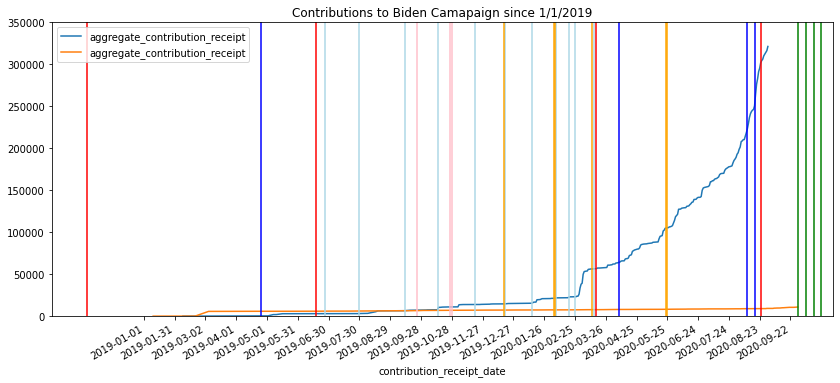

In [28]:
from datetime import datetime, timedelta
t = np.arange(datetime(2019,1,1), datetime(2020,10,1), timedelta(days=30)).astype(datetime)
ymax = 350000

df20_biden = df20_biden.assign(aggregate_contribution_receipt=df20_biden["contribution_receipt_amount"].cumsum())

ax1 = df20_biden.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, ymax]) 
ax1.set_title("Contributions to Biden Campaign since 1/1/2019")

df20_trump = df20_trump.assign(aggregate_contribution_receipt=df20_trump["contribution_receipt_amount"].cumsum())

ax2 = df20_trump.plot(x="contribution_receipt_date", y="aggregate_contribution_receipt",
             figsize=(14, 6), ax=ax1)  
ax2.set_xticks(t)
ax2.set_ylim([0, ymax]) 
ax2.set_title("Contributions to Biden Camapaign since 1/1/2019")

df20_events = pd.read_csv(DIR + "/2020events.csv") 
print(df20_events)

for dd in df20_events.loc[:,"dem_debates"]:
    plt.axvline(x=dd,color="lightblue")

for dd in df20_events.loc[:,"gop_debates"]:
    plt.axvline(x=dd,color="pink")

for dd in df20_events.loc[:,"biden_campaign_events"]:
    plt.axvline(x=dd,color="blue")

for dd in df20_events.loc[:,"trump_campaign_events"]:
    plt.axvline(x=dd,color="red")

for dd in df20_events.loc[:,"pres_debates"]:
    plt.axvline(x=dd,color="green")

for dd in df20_events.loc[:,"other"]:
    plt.axvline(x=dd,color="orange")


plt.savefig("2020TimeNEW.pdf", transparent=True)